In [1]:
import torch 
from torch import nn
import torchvision
from torchvision import datasets
from torchvision.transforms import v2
from torch.utils.data import DataLoader,random_split,WeightedRandomSampler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
import numpy as np
from collections import Counter

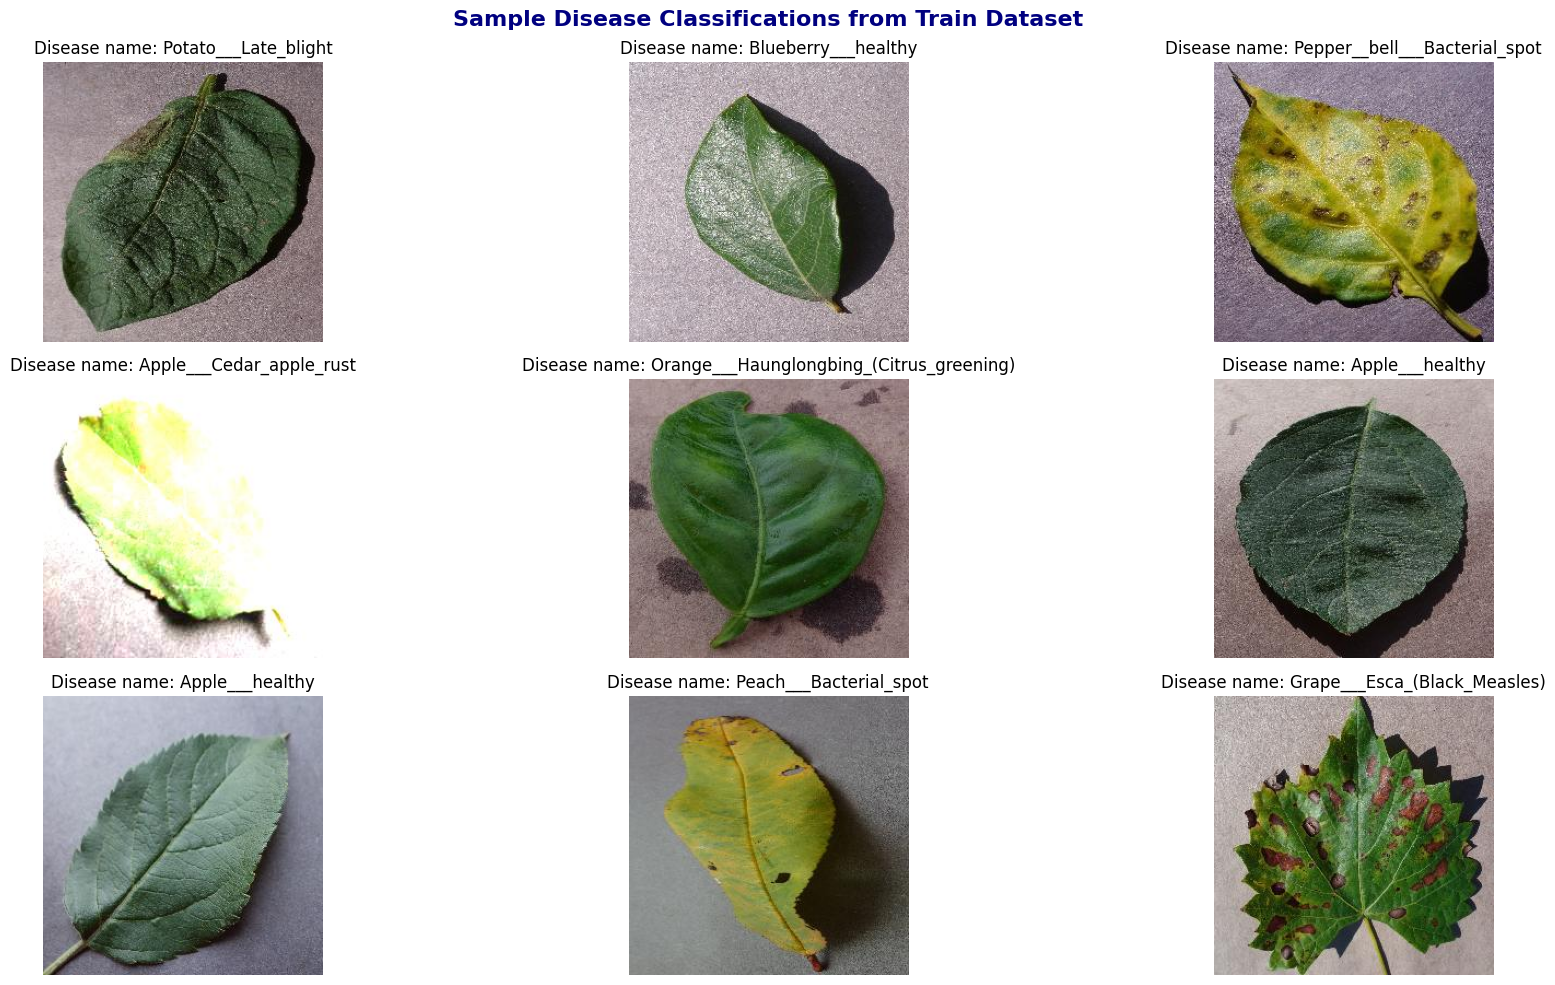

In [2]:
plotdata=datasets.ImageFolder(root=r"C:\Users\Avijit\Desktop\AgriAssure\PLANTCURE\DATASET\PlantVillage")
classname=plotdata.classes
plt.style.use("seaborn-v0_8-muted")
plt.figure(figsize=(20,10))
rows,cols=3,3
for i in range(1,rows*cols+1):
    plt.subplot(rows,cols,i)
    randomid=torch.randint(0,len(plotdata),size=[1]).item()
    img,label=plotdata[randomid]
    plt.imshow(img)
    plt.title(f"Disease name: {classname[label]}")
    plt.axis(False)
plt.suptitle("Sample Disease Classifications from Train Dataset", fontsize=16, fontweight='bold', color='navy')
plt.tight_layout()
plt.show()

In [3]:
import os

root = r"C:\Users\Avijit\Desktop\AgriAssure\PLANTCURE\DATASET\PlantVillage"
for class_folder in os.listdir(root):
    class_path = os.path.join(root, class_folder)
    if os.path.isdir(class_path):
        images = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
        print(f"{class_folder}: {len(images)} images")


Apple___Apple_scab: 2016 images
Apple___Black_rot: 1987 images
Apple___Cedar_apple_rust: 1760 images
Apple___healthy: 2008 images
Blueberry___healthy: 1816 images
Cherry_(including_sour)___healthy: 1826 images
Cherry_(including_sour)___Powdery_mildew: 1683 images
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot: 1590 images
Corn_(maize)___Common_rust_: 1907 images
Corn_(maize)___healthy: 1859 images
Corn_(maize)___Northern_Leaf_Blight: 1908 images
Grape___Black_rot: 1888 images
Grape___Esca_(Black_Measles): 1920 images
Grape___healthy: 1692 images
Grape___Leaf_blight_(Isariopsis_Leaf_Spot): 1722 images
Orange___Haunglongbing_(Citrus_greening): 2010 images
Peach___Bacterial_spot: 1838 images
Peach___healthy: 1728 images
Pepper__bell___Bacterial_spot: 997 images
Pepper__bell___healthy: 1478 images
Potato___Early_blight: 2149 images
Potato___healthy: 1854 images
Potato___Late_blight: 2131 images
Raspberry___healthy: 1781 images
Soybean___healthy: 2022 images
Squash___Powdery_mildew: 173

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.6784315].


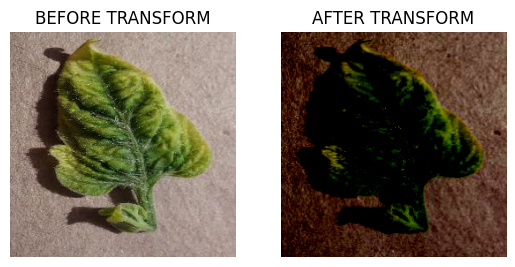

In [4]:
from pathlib import Path
from PIL import Image
import random
imagepath=Path(r"C:\Users\Avijit\Desktop\AgriAssure\PLANTCURE\DATASET\PlantVillage")
data_transform = v2.Compose([
    v2.Resize((224, 224)),                            # Resize to AlexNet input size
    v2.ToImage(),                                     # Needed before color transforms
    v2.RandomHorizontalFlip(p=0.3),                   # Flip
    v2.RandomAutocontrast(p=0.2),                     # Random autocontrast
    v2.ToDtype(torch.float32, scale=True),            # Scale to [0, 1]
    v2.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize to [-1, 1]
])
def plot_original_transform(imagpath,transform):
    randomimglist=random.choice(list(imagepath.rglob('*.jpg')))
    image=Image.open(randomimglist).convert("RGB")
    plt.subplot(1,2,1)
    plt.imshow(image)
    plt.title("BEFORE TRANSFORM")
    plt.axis(False)
    transform_img=transform(image)
    plt.subplot(1,2,2)
    plt.imshow(transform_img.permute(1,2,0))
    plt.title("AFTER TRANSFORM")
    plt.axis(False)
plot_original_transform(imagepath,data_transform)

In [4]:
torch.cuda.empty_cache()

In [6]:
from collections import Counter
import matplotlib.pyplot as plt
def check_imbalance_class(data):
    labels=[sample[1] for sample in data]
    class_count=Counter(labels)
    
    class_names = data.classes

    for i, counts in class_count.items():
     print(f"{class_names[i]}: {counts}")
     
    counts=np.array(list(class_count.values()))
    imbalance_ratio=counts.max()/counts.min()
    print(f"CLASS IMBALANCE RATION : {imbalance_ratio:.2f}")


     
    plt.figure(figsize=(20, 5))
    plt.bar([class_names[i] for i in class_count.keys()], class_count.values())
    plt.xticks(rotation=60, ha='right', fontsize=6)  # rotated + smaller font
    plt.title("Class Distribution")
    plt.xlabel("Class")
    plt.ylabel("Number of Images")
    plt.tight_layout()
    plt.show()

Apple___Apple_scab: 4032
Apple___Black_rot: 1987
Apple___Cedar_apple_rust: 1760
Apple___healthy: 2008
Blueberry___healthy: 1816
Cherry_(including_sour)___Powdery_mildew: 1683
Cherry_(including_sour)___healthy: 1826
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot: 1590
Corn_(maize)___Common_rust_: 1907
Corn_(maize)___Northern_Leaf_Blight: 1908
Corn_(maize)___healthy: 1859
Grape___Black_rot: 1888
Grape___Esca_(Black_Measles): 1920
Grape___Leaf_blight_(Isariopsis_Leaf_Spot): 1722
Grape___healthy: 1692
Orange___Haunglongbing_(Citrus_greening): 2010
Peach___Bacterial_spot: 1838
Peach___healthy: 1728
Pepper__bell___Bacterial_spot: 997
Pepper__bell___healthy: 1478
Potato___Early_blight: 2149
Potato___Late_blight: 2131
Potato___healthy: 1854
Raspberry___healthy: 1781
Soybean___healthy: 2022
Squash___Powdery_mildew: 1736
Strawberry___Leaf_scorch: 1774
Strawberry___healthy: 1824
Tomato__Target_Spot: 1404
Tomato___Bacterial_spot: 1702
Tomato___Early_blight: 1920
Tomato___Late_blight: 1851
Toma

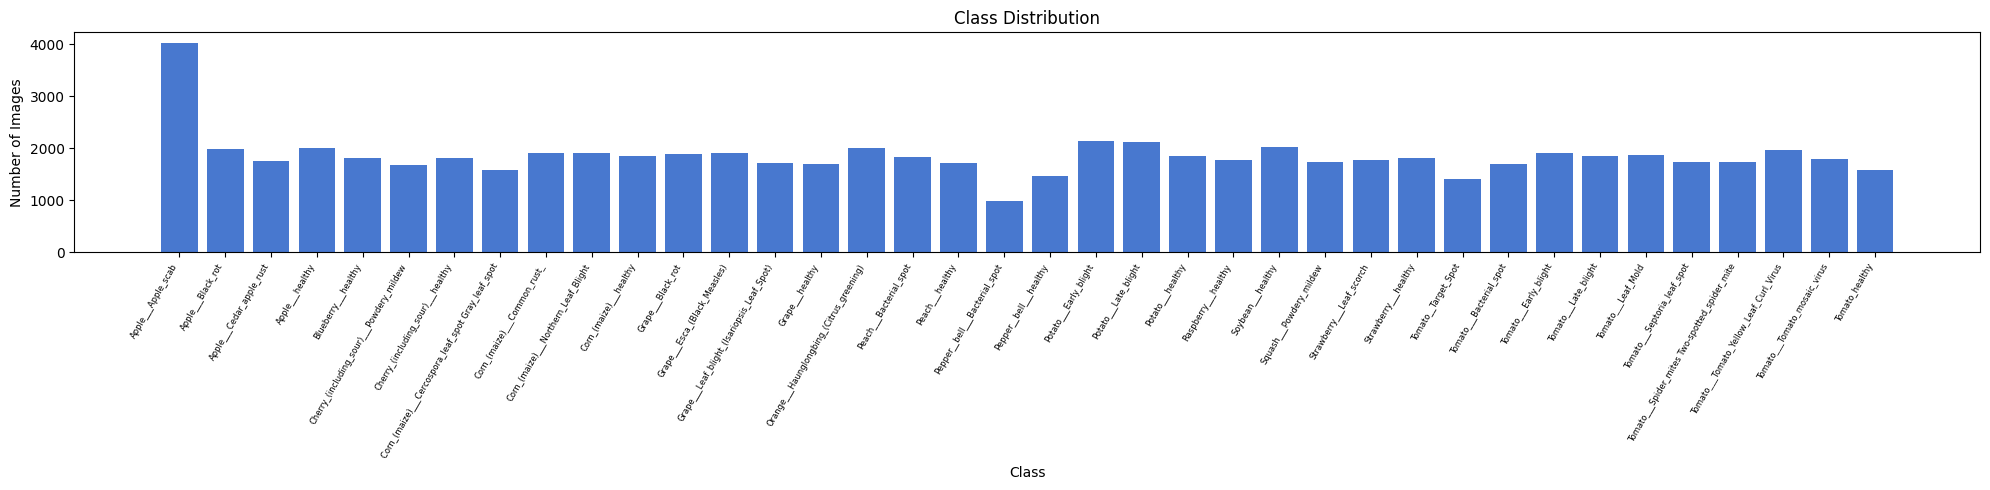

In [7]:
plantdata=plotdata
check_imbalance_class(plantdata)

In [5]:
import os
def getloader(root_directory, batch_size, train_ratio, image_size):
    # Transform (ImageNet normalization for pretrained models like EfficientNet)
    data_transform = v2.Compose([
    v2.Resize((224, 224)),                            # Resize to AlexNet input size
    v2.ToImage(),                                     # Needed before color transforms
    v2.RandomHorizontalFlip(p=0.3),                   # Flip
    v2.ToDtype(torch.float32, scale=True),            # Scale to [0, 1]
    v2.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize to [-1, 1]
    ])
    # Load dataset
    full_dataset = datasets.ImageFolder(root=root_directory, transform=data_transform)

    # Train-test split
    train_size = int(train_ratio * len(full_dataset))
    test_size = len(full_dataset) - train_size
    train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])

    # Calculate class weights for sampler (to handle class imbalance)
    train_labels = [train_dataset[i][1] for i in range(len(train_dataset))]
    class_counts = Counter(train_labels)
    class_weights = {label: 1.0 / count for label, count in class_counts.items()}
    sample_weights = [class_weights[label] for label in train_labels]
    sampler = WeightedRandomSampler(sample_weights, num_samples=len(sample_weights), replacement=True)

    # Loaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, num_workers=os.cpu_count(),sampler=sampler,pin_memory=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, num_workers=os.cpu_count(),shuffle=True,pin_memory=True)

    return train_loader, test_loader

In [6]:
root=r"C:\Users\Avijit\Desktop\AgriAssure\PLANTCURE\DATASET\PlantVillage"
trainloader,testloader=getloader(root,50,0.8,224)

In [10]:
from collections import Counter
import torch

def count_class_distribution(dataloader):
    class_counts = Counter()
    for _, labels in dataloader:
        if isinstance(labels, torch.Tensor):
            labels = labels.tolist()
        class_counts.update(labels)
    return class_counts
train_class_counts = count_class_distribution(trainloader)
test_class_counts = count_class_distribution(testloader)

print("Train Class Distribution:", dict(train_class_counts))
print("Test Class Distribution:", dict(test_class_counts))


Train Class Distribution: {25: 1457, 35: 1468, 27: 1453, 3: 1487, 9: 1530, 22: 1468, 10: 1527, 5: 1469, 32: 1505, 29: 1442, 15: 1547, 6: 1498, 24: 1480, 36: 1540, 23: 1446, 19: 1390, 26: 1445, 37: 1460, 20: 1485, 16: 1485, 31: 1482, 0: 1492, 21: 1490, 1: 1473, 28: 1451, 13: 1466, 4: 1436, 7: 1532, 12: 1584, 14: 1481, 2: 1534, 30: 1585, 11: 1447, 18: 1492, 33: 1474, 17: 1496, 34: 1479, 8: 1429}
Test Class Distribution: {27: 353, 17: 331, 30: 422, 23: 356, 11: 399, 31: 378, 34: 362, 3: 378, 36: 366, 13: 324, 24: 392, 10: 376, 15: 354, 29: 350, 0: 842, 1: 395, 7: 344, 12: 382, 2: 342, 26: 351, 37: 327, 22: 373, 16: 384, 4: 368, 9: 372, 14: 341, 8: 389, 32: 353, 33: 352, 5: 343, 20: 456, 28: 275, 25: 330, 19: 273, 6: 370, 21: 437, 18: 197, 35: 365}


In [101]:
len(trainloader)*32+len(testloader)*32,

(70528,)

In [69]:
train_feature_batch,train_label=next(iter(trainloader))
test_feature_batch,test_label=next(iter(testloader))

In [70]:
train_feature_batch.shape

torch.Size([32, 3, 224, 224])

In [ ]:
from torchvision import models

# Load pre-trained AlexNet
model= models.vit_b_16(weights=models.ViT_B_16_Weights)

c:\Users\Avijit\Desktop\AgriAssure\AGROENV\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ViT_B_16_Weights.IMAGENET1K_V1`. You can also use `weights=ViT_B_16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to C:\Users\Avijit/.cache\torch\hub\checkpoints\vit_b_16-c867db91.pth
100%|██████████| 330M/330M [00:30<00:00, 11.5MB/s] 


In [10]:
model

VisionTransformer(
  (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_a

In [9]:
from torchinfo import summary
summary(model)

Layer (type:depth-idx)                                            Param #
VisionTransformer                                                 768
├─Conv2d: 1-1                                                     590,592
├─Encoder: 1-2                                                    151,296
│    └─Dropout: 2-1                                               --
│    └─Sequential: 2-2                                            --
│    │    └─EncoderBlock: 3-1                                     7,087,872
│    │    └─EncoderBlock: 3-2                                     7,087,872
│    │    └─EncoderBlock: 3-3                                     7,087,872
│    │    └─EncoderBlock: 3-4                                     7,087,872
│    │    └─EncoderBlock: 3-5                                     7,087,872
│    │    └─EncoderBlock: 3-6                                     7,087,872
│    │    └─EncoderBlock: 3-7                                     7,087,872
│    │    └─EncoderBlock: 3-8         

In [71]:
import torch.nn as nn
from torchvision import models

def get_efficientnet_model(num_class, mode='partial'):
    """
    Load EfficientNet with specified fine-tuning mode.

    Args:
        num_class (int): Number of output classes
        mode (str): 'no_tune', 'partial', or 'full'

    Returns:
        model (nn.Module): EfficientNet model ready to train
    """
    assert mode in ['no_tune', 'partial', 'full'], "Mode must be 'no_tune', 'partial', or 'full'"

    model = models.efficientnet_v2_m(weights=models.EfficientNet_V2_M_Weights)
    infeature=model.classifier[-1].in_features
    model.classifier[-1] = nn.Linear(in_features=infeature,out_features=num_class)

    if mode=='no_tune':
        for param in model.parameters():
            param.requires_grad=False
        for param in model.classifier[-1].parameters():
            param.requires_grad=True
    elif mode == 'partial':
        for param in model.parameters():
            param.requires_grad=False
        for param in model.classifier.parameters():
            param.requires_grad = True
    elif mode == 'full':
        for param in model.parameters():
            param.requires_grad = True

    return model


In [72]:
def show_trainable_layers(model):
    print("🔍 Trainable layers in the model:\n")
    for name, param in model.named_parameters():
        if param.requires_grad:
            print(f"✅ {name}")
        else:
            print(f"❌ {name}")


In [73]:
classname=plotdata.classes
classname

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato__Target_Spot',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___S

In [74]:
from torchinfo import summary
device='cuda' if torch.cuda.is_available() else 'cpu'
# model=CNN1(input=3,hidden_units=128,output=len(data.classes)).to(device)
model=get_efficientnet_model(num_class=len(classname),mode='no_tune').to(device)

c:\Users\Avijit\Desktop\AgriAssure\AGROENV\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_V2_M_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_V2_M_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [75]:
show_trainable_layers(model)

🔍 Trainable layers in the model:

❌ features.0.0.weight
❌ features.0.1.weight
❌ features.0.1.bias
❌ features.1.0.block.0.0.weight
❌ features.1.0.block.0.1.weight
❌ features.1.0.block.0.1.bias
❌ features.1.1.block.0.0.weight
❌ features.1.1.block.0.1.weight
❌ features.1.1.block.0.1.bias
❌ features.1.2.block.0.0.weight
❌ features.1.2.block.0.1.weight
❌ features.1.2.block.0.1.bias
❌ features.2.0.block.0.0.weight
❌ features.2.0.block.0.1.weight
❌ features.2.0.block.0.1.bias
❌ features.2.0.block.1.0.weight
❌ features.2.0.block.1.1.weight
❌ features.2.0.block.1.1.bias
❌ features.2.1.block.0.0.weight
❌ features.2.1.block.0.1.weight
❌ features.2.1.block.0.1.bias
❌ features.2.1.block.1.0.weight
❌ features.2.1.block.1.1.weight
❌ features.2.1.block.1.1.bias
❌ features.2.2.block.0.0.weight
❌ features.2.2.block.0.1.weight
❌ features.2.2.block.0.1.bias
❌ features.2.2.block.1.0.weight
❌ features.2.2.block.1.1.weight
❌ features.2.2.block.1.1.bias
❌ features.2.3.block.0.0.weight
❌ features.2.3.block.0.1

In [76]:
summary(model,input_size=(32,3,224,224))

Layer (type:depth-idx)                                  Output Shape              Param #
EfficientNet                                            [32, 38]                  --
├─Sequential: 1-1                                       [32, 1280, 7, 7]          --
│    └─Conv2dNormActivation: 2-1                        [32, 24, 112, 112]        --
│    │    └─Conv2d: 3-1                                 [32, 24, 112, 112]        (648)
│    │    └─BatchNorm2d: 3-2                            [32, 24, 112, 112]        (48)
│    │    └─SiLU: 3-3                                   [32, 24, 112, 112]        --
│    └─Sequential: 2-2                                  [32, 24, 112, 112]        --
│    │    └─FusedMBConv: 3-4                            [32, 24, 112, 112]        (5,232)
│    │    └─FusedMBConv: 3-5                            [32, 24, 112, 112]        (5,232)
│    │    └─FusedMBConv: 3-6                            [32, 24, 112, 112]        (5,232)
│    └─Sequential: 2-3                  

In [86]:
from torchvision.transforms import v2


In [87]:
import torchvision
print(torchvision.__version__)


0.20.1+cu118


In [88]:
import torch
import matplotlib.pyplot as plt
from PIL import Image
from torchvision.transforms import v2

def visualize_feature_maps(model, imgpath, device, hookid, hookname):
    activation = {}

    def get_activation(name):
        def hook(model, input, output):
            if isinstance(output, list):
                activation[name] = [o.detach().cpu() for o in output]
            else:
                activation[name] = output.detach().cpu()
        return hook

    handle = model.features[hookid].register_forward_hook(get_activation(hookname))

    # Correct v2 pipeline
    data_transform = v2.Compose([
        v2.ToImage(),  # Convert from PIL to image tensor
        v2.Resize((224, 224)),
        v2.RandomHorizontalFlip(p=0.3),
        v2.ToDtype(torch.float32, scale=True),
        v2.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

    img = Image.open(imgpath).convert("RGB")
    input_tensor = data_transform(img).unsqueeze(0).to(device)

    model.eval()
    with torch.inference_mode():
        _ = model(input_tensor)

    handle.remove()
    act = activation[hookname].squeeze()  # [C, H, W]

    plt.figure(figsize=(10, 10))
    for i in range(min(16, act.shape[0])):
        plt.subplot(4, 4, i + 1)
        plt.imshow(act[i], cmap="viridis")
        plt.axis("off")
    plt.suptitle(f"Feature Maps from Block {hookid}")
    plt.tight_layout()
    plt.show()


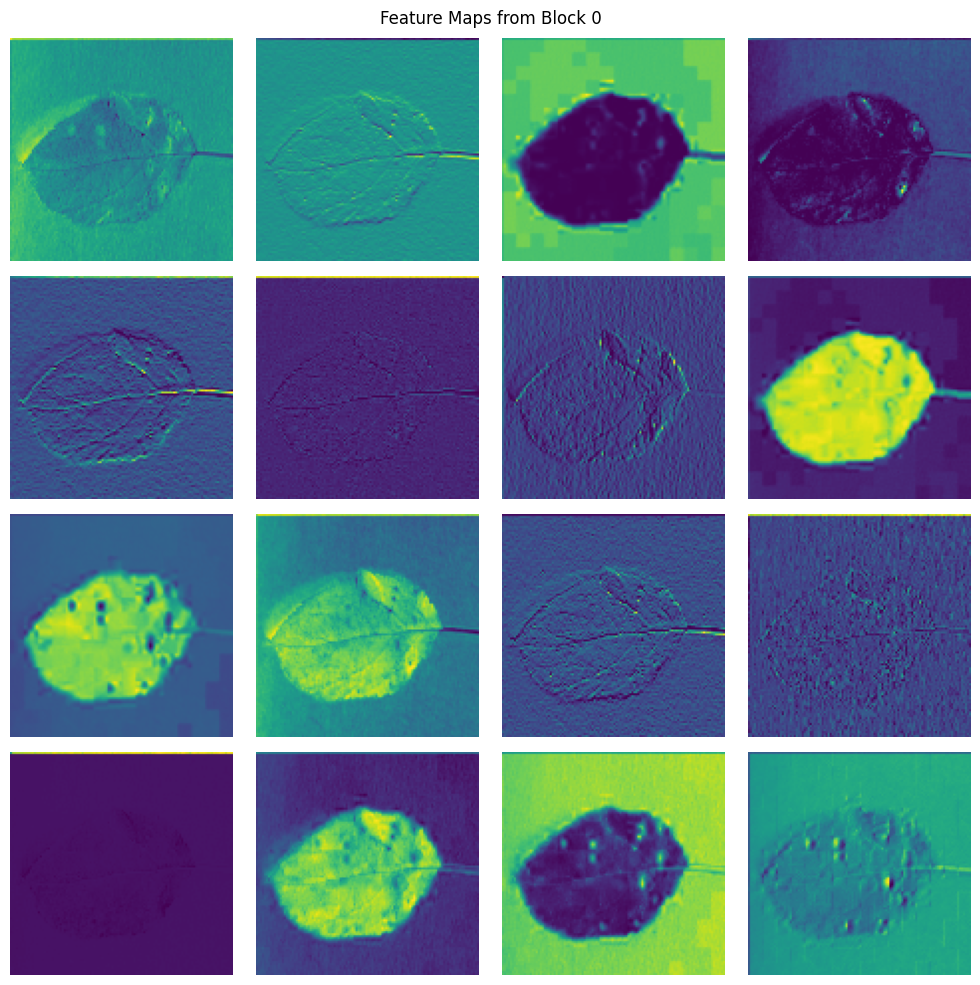

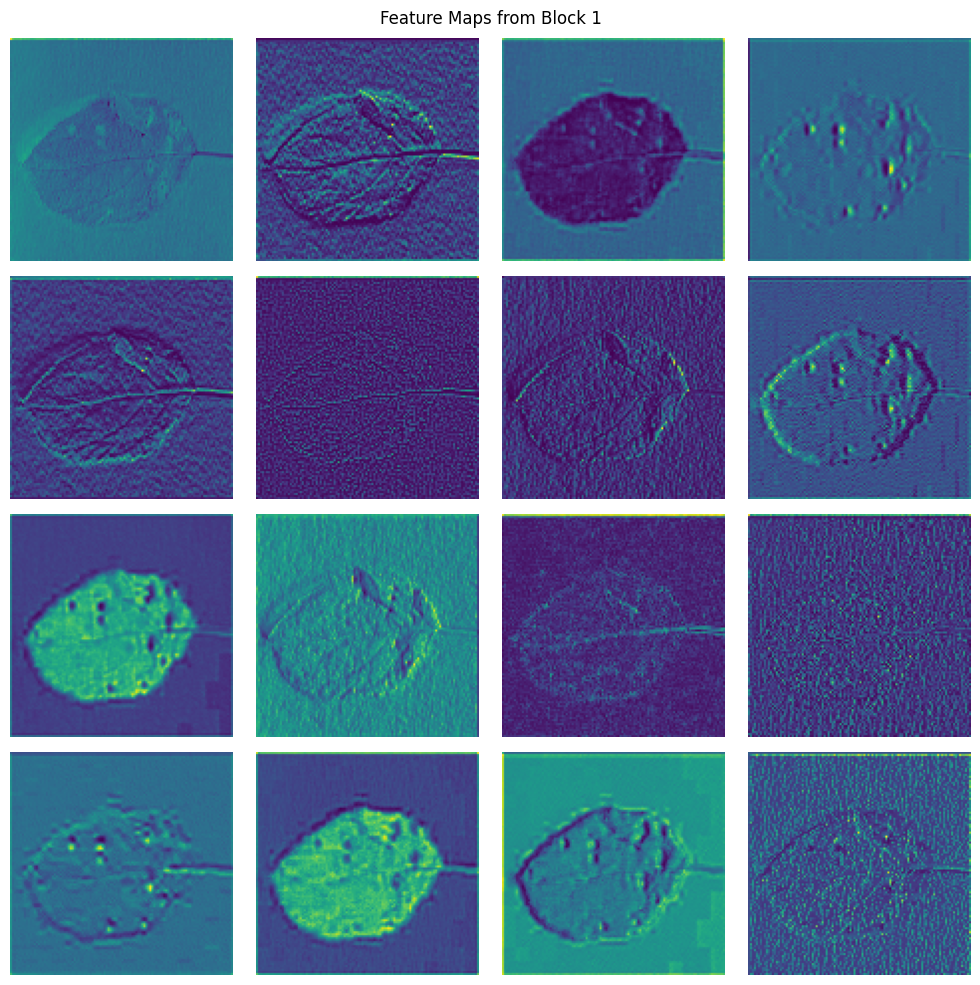

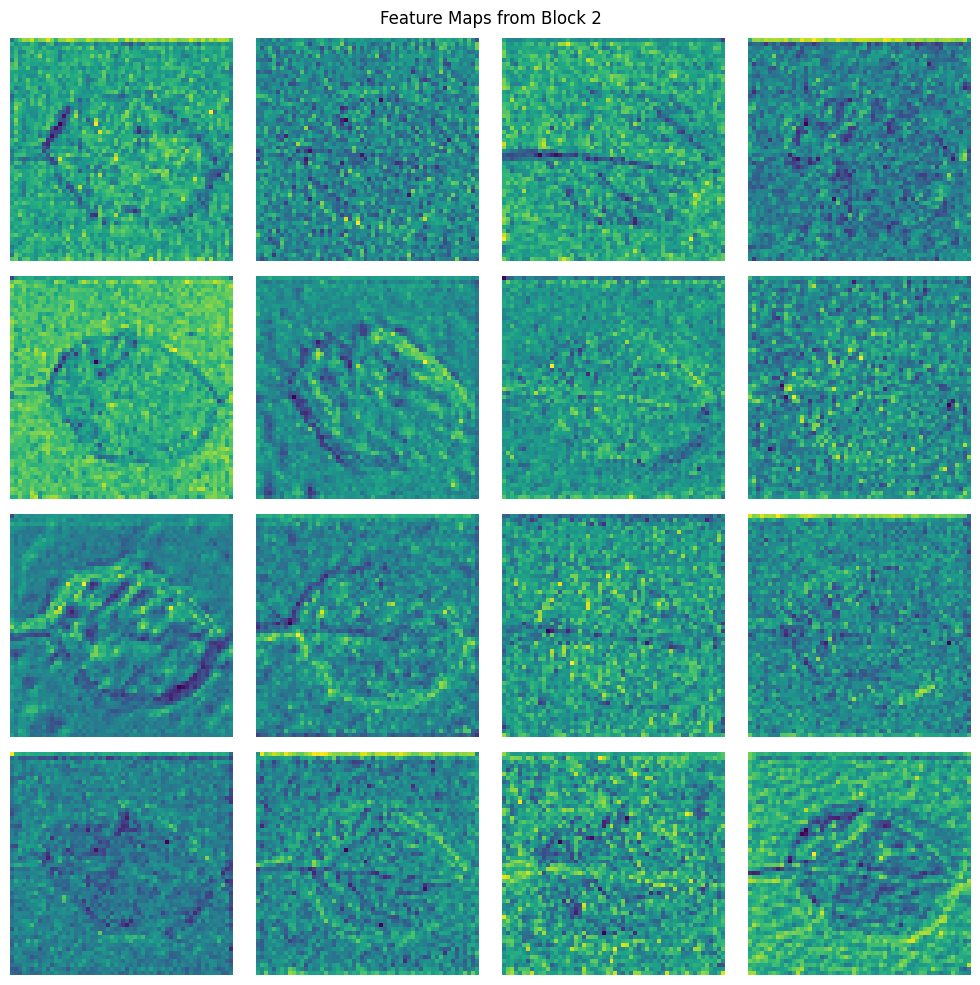

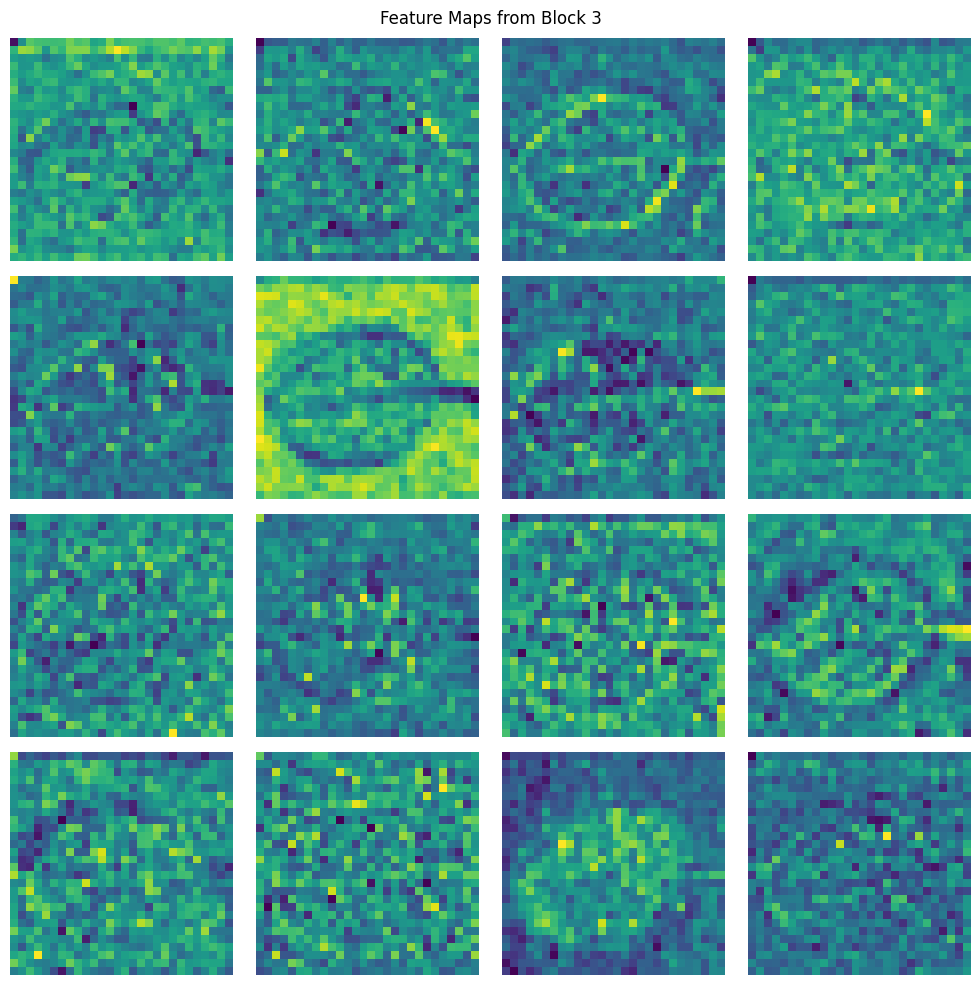

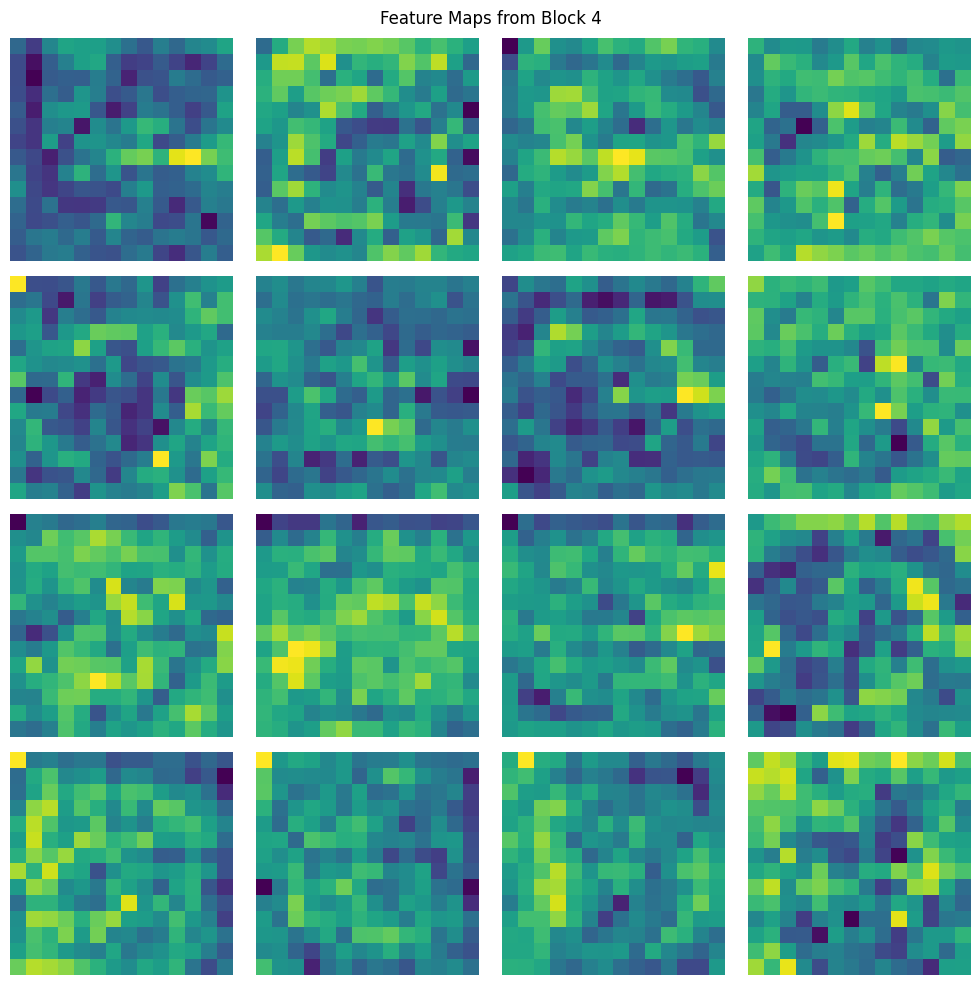

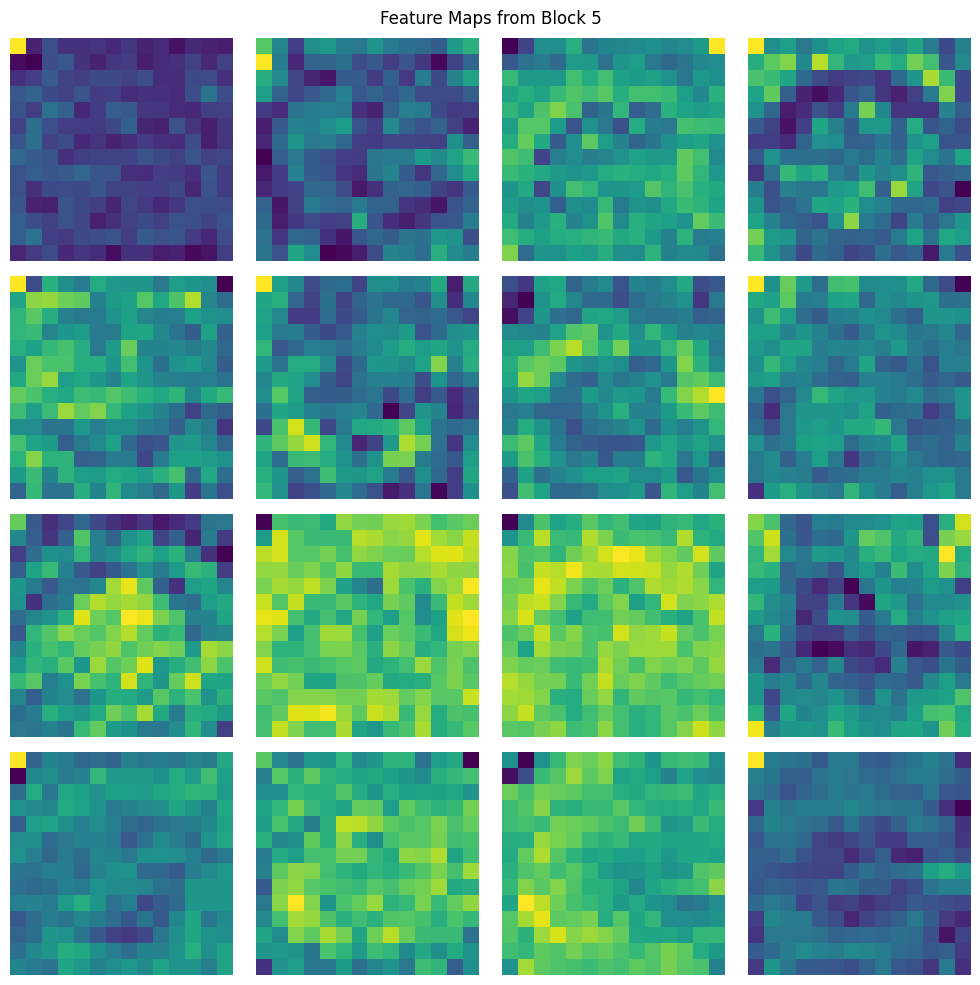

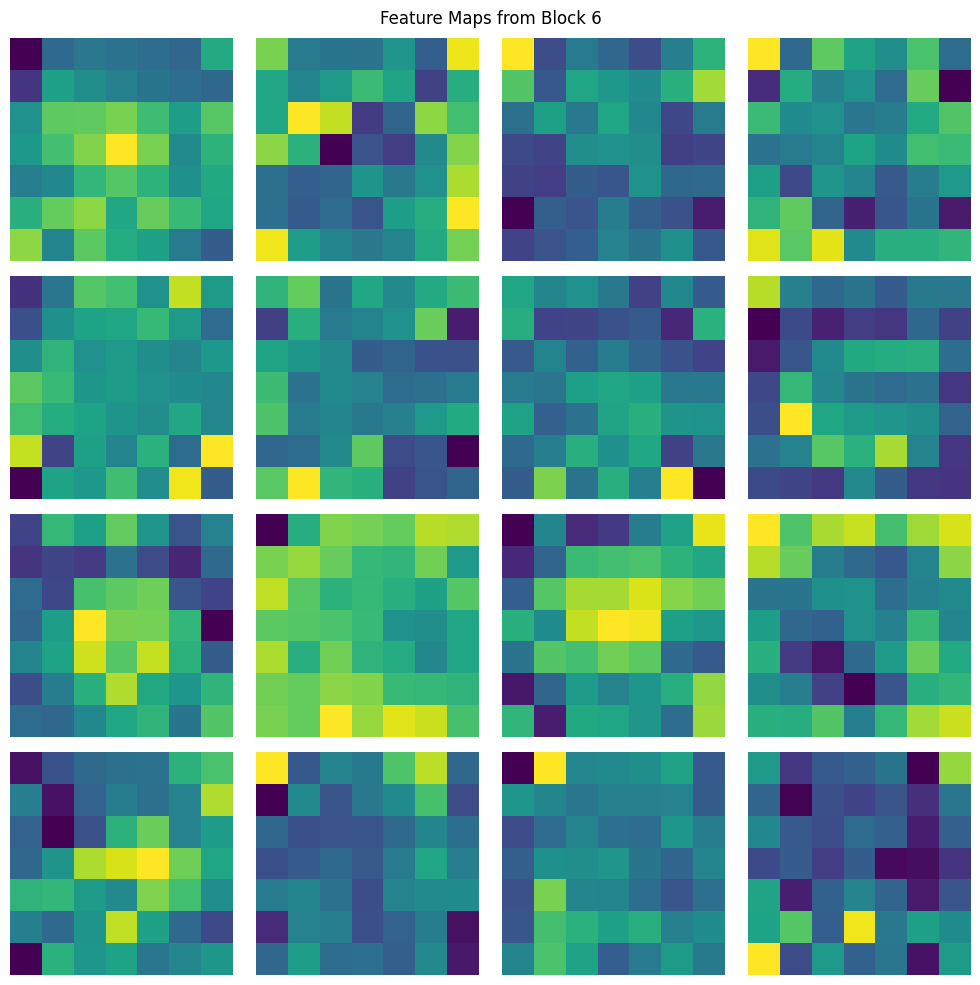

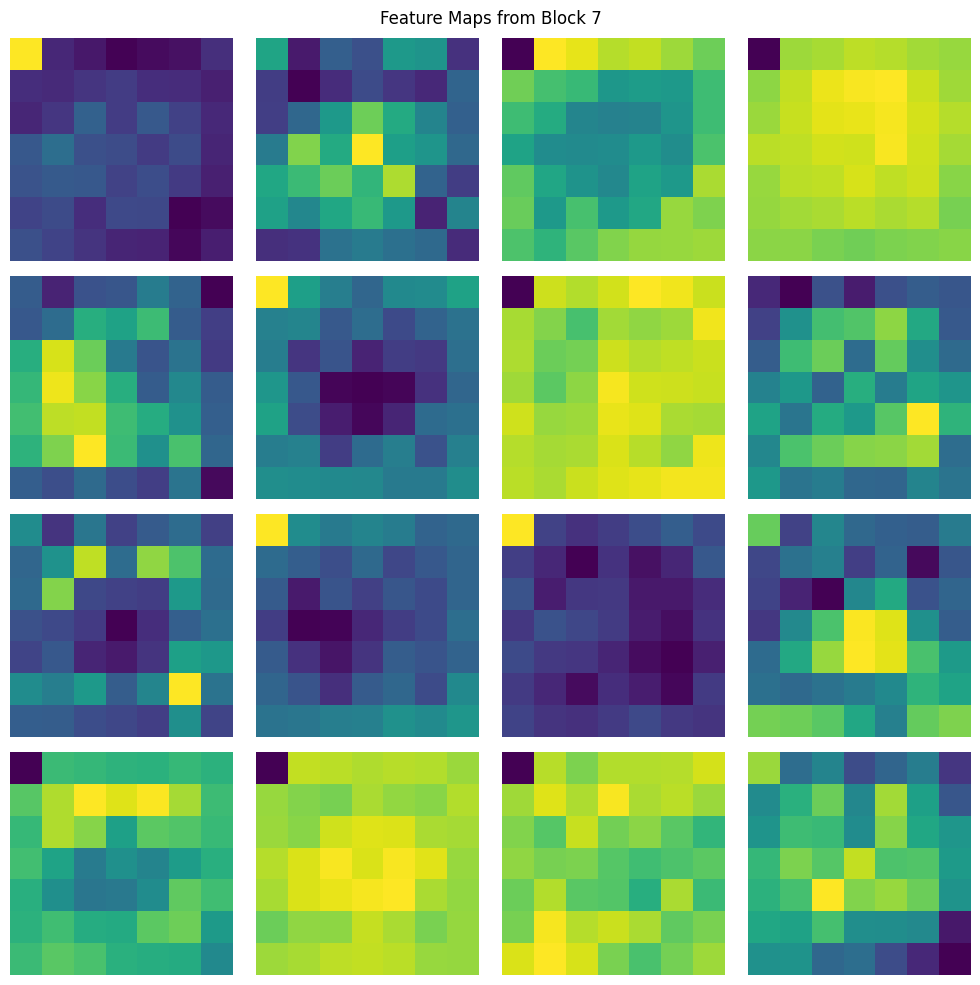

In [89]:
impath=r"C:\Users\Avijit\Desktop\AgriAssure\PLANTCURE\DATASET\PlantVillage\Apple___Cedar_apple_rust\0a41c25a-f9a6-4c34-8e5c-7f89a6ac4c40___FREC_C.Rust 9807_90deg.JPG"
for i in range(0,8):
 visualize_feature_maps(model,impath,device,hookid=i,hookname=f'block{i}')

In [53]:
loss=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(params=model.parameters(),lr=0.001)

In [54]:
from tqdm.auto import tqdm

In [55]:
def train(model, dataloader, lossfn, optimizer, device):
    model.train()
    trainloss, trainacc = 0, 0

    for batch, (x, y) in tqdm(enumerate(dataloader), total=len(dataloader), desc='Training', leave=False):
        x, y = x.to(device), y.to(device)
        pred = model(x)
        loss = lossfn(pred, y)
        trainloss += loss.item()

        prob = torch.argmax(pred, dim=1)
        trainacc += accuracy_score(y.detach().cpu().numpy(), prob.detach().cpu().numpy())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 200 == 0:
            tqdm.write(f"🟩 Looked at {batch * len(x)}/{len(dataloader.dataset)} | Loss: {loss.item():.4f}")

    trainloss /= len(dataloader)
    trainacc /= len(dataloader)
    print(f"\n✅ TRAINING COMPLETE — Loss: {trainloss:.4f} | Accuracy: {trainacc:.4f}")
    return trainloss, trainacc

def test(model, dataloader, lossfn, device):
    model.eval()
    testloss, testacc = 0, 0

    with torch.inference_mode():
        for batch, (x, y) in tqdm(enumerate(dataloader), total=len(dataloader), desc='Testing', leave=False):
            x, y = x.to(device), y.to(device)
            pred = model(x)
            loss = lossfn(pred, y)
            testloss += loss.item()

            prob = torch.argmax(pred, dim=1)
            testacc += accuracy_score(y.detach().cpu().numpy(), prob.detach().cpu().numpy())

            if batch % 400 == 0:
                tqdm.write(f"🟦 Looked at {batch * len(x)}/{len(dataloader.dataset)} | Loss: {loss.item():.4f}")

    testloss /= len(dataloader)
    testacc /= len(dataloader)
    print(f"\n🔎 TESTING COMPLETE — Loss: {testloss:.4f} | Accuracy: {testacc:.4f}")
    return testloss, testacc

In [56]:
from torch.utils.tensorboard import SummaryWriter
writer=SummaryWriter(log_dir='runs9/experiment1')

In [57]:

best_acc = 0.0             
best_model_state = None    
patience = 2
counter = 0
min_delta = 0.001         

train_loss, train_acc, test_loss, test_acc = [], [], [], []

epochs=15
for epoch in tqdm(range(epochs), desc='Training', ncols=150):
    print(f"\nEpoch --> [{epoch+1}]")
    
    trainloss, trainacc = train(model, trainloader, loss, optimizer, device)
    testloss, testacc = test(model, testloader, loss, device)
    writer.add_scalar("Loss/Train", trainloss, epoch)
    writer.add_scalar("Loss/Test", testloss, epoch)
    writer.add_scalar("Accuracy/Train", trainacc, epoch)
    writer.add_scalar("Accuracy/Test", testacc, epoch)

    train_loss.append(trainloss)
    train_acc.append(trainacc)
    test_loss.append(testloss)
    test_acc.append(testacc)

    # 🔍 Check for improvement in test accuracy
    if testacc > best_acc + min_delta:
        best_acc = testacc
        counter = 0
        best_model_state = model.state_dict()  # Save best model in memory
        print(f"✅ Best model updated at epoch {epoch+1} with test accuracy: {testacc:.4f}")
    else:
        counter += 1
        print(f"🛑 No improvement. Patience: {counter}/{patience}")

    if counter >= patience:
        print(f"\n⛔ Early stopping triggered at epoch {epoch+1}. Best accuracy: {best_acc:.4f}")
        break

if best_model_state is not None:
    model.load_state_dict(best_model_state)
    print(f"\n🎯 Best model loaded with test accuracy: {best_acc:.4f}")
writer.close()



Training:   0%|                                                                                               …


Epoch --> [1]


Training:   0%|          | 0/1129 [00:00<?, ?it/s]

🟩 Looked at 0/56405 | Loss: 3.6837
🟩 Looked at 10000/56405 | Loss: 0.3410
🟩 Looked at 20000/56405 | Loss: 0.2200
🟩 Looked at 30000/56405 | Loss: 0.1909


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x0000029B0606AF80>
Traceback (most recent call last):
  File "c:\Users\Avijit\Desktop\AgriAssure\AGROENV\lib\site-packages\torch\utils\data\dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "c:\Users\Avijit\Desktop\AgriAssure\AGROENV\lib\site-packages\torch\utils\data\dataloader.py", line 1568, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "C:\Users\Avijit\AppData\Local\Programs\Python\Python310\lib\multiprocessing\process.py", line 149, in join
    res = self._popen.wait(timeout)
  File "C:\Users\Avijit\AppData\Local\Programs\Python\Python310\lib\multiprocessing\popen_spawn_win32.py", line 108, in wait
    res = _winapi.WaitForSingleObject(int(self._handle), msecs)
KeyboardInterrupt: 


KeyboardInterrupt: 

In [55]:
dummy_input = torch.randn(1, 3, 227, 227).to(device)  
writer.add_graph(model, dummy_input)


In [56]:
images, labels = next(iter(trainloader))

# Log input images
img_grid = torchvision.utils.make_grid(images[:16])  # First 16 images
writer.add_image('Sample Inputs', img_grid)


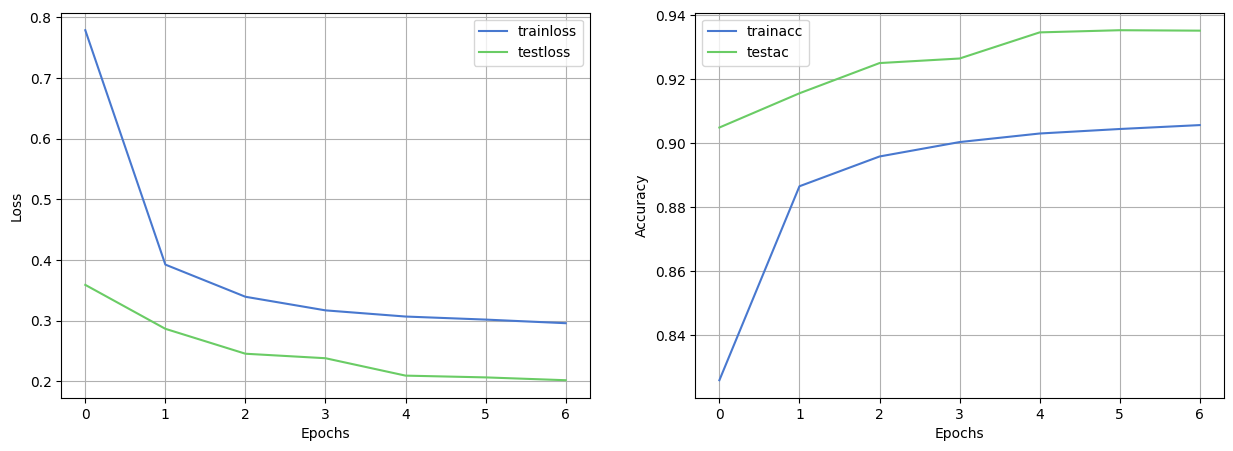

In [54]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(train_loss,)
plt.plot(test_loss)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['trainloss','testloss'])
plt.grid(True)
plt.subplot(1,2,2)
plt.plot(train_acc,)
plt.plot(test_acc)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['trainacc','testac'])
plt.grid(True)
plt.show()

In [57]:
y_pred,y_true=[],[]
model.eval()
with torch.inference_mode():
    for (xsam,ysam) in (testloader):
        xsam,ysam=xsam.to(device),ysam.to(device)
        testpred=model(xsam)
        testpred=torch.softmax(testpred,dim=1)
        testprob=torch.argmax(testpred,dim=1)
        y_pred.extend(testprob.detach().cpu().numpy())
        y_true.extend(ysam.detach().cpu().numpy())

In [61]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm=confusion_matrix(y_true,y_pred)
plt.figure(figsize=(100,70))
sns.heatmap(cm,fmt='d',annot=True,cmap=plt.cm.turbo,xticklabels=plotdata.classes,yticklabels=plotdata.classes,linecolor='white',linewidths=1.0)
plt.xticks(fontsize=30,rotation=60)
plt.yticks(fontsize=20,rotation=60)
plt.tight_layout()
plt.show()

In [65]:
torch.save(model,r"C:\Users\Avijit\Desktop\AgriAssure\PLANTCURE\MODELS_DISEASE_DETECT\efficientnet.pth")

C:\Users\Avijit\AppData\Local\Temp\ipykernel_13128\4086952074.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model=torch.load(r"C:\Users\Avijit\Desktop\AgriAssure\PLANT

(np.float64(-0.5), np.float64(258.5), np.float64(193.5), np.float64(-0.5))

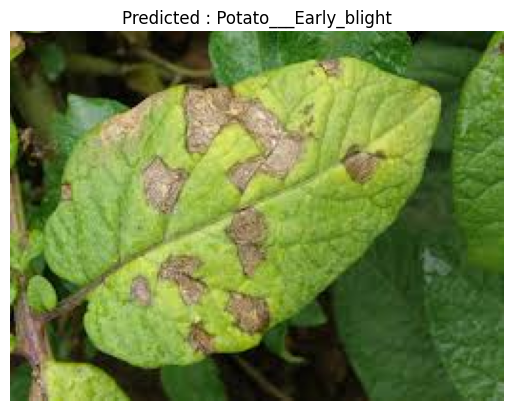

In [68]:
from PIL import Image
model=torch.load(r"C:\Users\Avijit\Desktop\AgriAssure\PLANTCURE\MODELS_DISEASE_DETECT\efficientnet.pth")
img=Image.open(r"C:\Users\Avijit\Desktop\AgriAssure\PLANTCURE\TESTIMAGE\potato_early_blight.jpg").convert("RGB")
transform = v2.Compose([
        v2.Resize((224,224)),
        v2.ToImage(),
        v2.RandomHorizontalFlip(p=0.3),
        v2.ToDtype(torch.float32, scale=True),
        v2.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

transform_img=transform(img).unsqueeze(0).to(device)
with torch.inference_mode():
    logit=model(transform_img)
    pred=torch.softmax(logit,dim=1)
    prob=torch.argmax(pred,dim=1)
class_name=plotdata.classes
plt.imshow(img)
plt.title(f"Predicted : {class_name[prob]}")
plt.axis(False)

In [100]:
torch.save(model, r"C:\Users\Avijit\Desktop\AgriAssure\PLANTCURE\MODELS\alexnet_full_model.pth")